## Exploratory Data Analysis UPI Rev.1
#### Dataset : https://github.com/crypter7054/Scraper-SINTA-UPI-2022 
#### Keterangan Atribut : 
- **name** = nama dosen 
- **sinta_id**  = id dosen pada website SINTA 
- **dept** = program studi 
- **sinta_score** = skor keseluruhan SINTA 
- **sinta_3yr_score** = skor SINTA dalam 3 tahun terakhir 
- **affil_score** = skor keseluruhan afiliasi 
- **affil_3yr_score** = skor afiliasi dalam 3 tahun terakhir 
- **scopus_h_index** = indeks untuk mengukur produktivitas berdasarkan jumlah publikasi dan sitasi dosen pada Scopus 
- **gs_h_index** = indeks untuk mengukur produktivitas berdasarkan jumlah publikasi dan sitasi dosen pada Google Scholar 
- **wos_h_index** = indeks untuk mengukur produktivitas berdasarkan jumlah publikasi dan sitasi dosen pada Web of Science 
- **scopus_i10_index** = skor dosen dalam publikasi artikel yang disitasi minimal oleh 10 artikel lain pada Scopus 
- **gs_i10_index** = skor dosen dalam publikasi artikel yang disitasi minimal oleh 10 artikel lain pada Google Scholar 
- **wos_i10_index** = skor dosen dalam publikasi artikel yang disitasi minimal oleh 10 artikel lain pada Web of Science 
- **scopus_g_index** = indeks untuk mengukur produktivitas berdasarkan distribusi sitasi dari publikasi dosen pada Scopus 
- **gs_g_index** = indeks untuk mengukur produktivitas berdasarkan distribusi sitasi dari publikasi dosen pada Google Scholar 
- **wos_g_index** = indeks untuk mengukur produktivitas berdasarkan distribusi sitasi dari publikasi dosen pada Web of Science
- **scopus_article** = jumlah publikasi artikel dosen pada Scopus 
- **scopus_citation** = jumlah sitasi pada publikasi dosen pada Scopus 
- **scopus_cited_document** = jumlah publikasi lain yang disitasi oleh dosen pada Scopus 
- **gs_article** = jumlah publikasi artikel dosen pada Google Scholar 
- **gs_citation** = jumlah sitasi pada publikasi dosen pada Google Scholar 
- **gs_cited_document** = jumlah publikasi lain yang disitasi oleh dosen pada Google Scholar 
- **wos_article** = jumlah publikasi artikel dosen pada Web of Science 
- **wos_citation** = jumlah sitasi pada publikasi dosen pada Web of Science 
- **wos_cited_document** = jumlah publikasi lain yang disitasi oleh dosen pada Web of Science

### Import Library

In [1]:
%matplotlib inline
import numpy as np                  
import pandas as pd                 
import matplotlib.pyplot as plt     
import seaborn as sns
from datetime import datetime, date

sns.set_theme(style="darkgrid", palette="deep")

### Data Overview

Terdapat 2 data yang digunakan yaitu, data SINTA(terdiri dari atribut skor SINTA dan beberapa index untuk mengukur produktivitas dosen ex: Scopus H Index dsb.) dan data dosen(berisi informasi fakultas, prodi, dan NIP).

- Data dosen : df_1, df_2 ,df_3
- Data SINTA : df_4
- Data gabungan (SINTA dan dosen) : df

Data dosen dibagi menjadi 2 dikarenakan terdapat perbedaan format NIP pada data dosen, dibagi menjadi 2 yaitu df_1 berisi data dosen dengan data NIP dosen format baru dan df_2 berisi data dosen dengan data NIP dosen format lama. Kemudian ditambahkan kolom baru yaitu '*Usia*' dan '*Jenis Kelamin*' yang dihasilkan dari kolom '*NIP*'. Selanjutnya df_1 dan df_2 di-*concat* menghasilkan df_3. Terakhir df_3 digabung dengan df_4 menjadi df, yang merupakan data utama yang akan diproses.

### Proses df_1

In [2]:
df_1 = pd.read_csv("C:\\Users\\LENOVO\\Scraper-SINTA-UPI-2022\\EDA data\\data_mentah\\convert\\joinSINTA.csv", sep=";", skiprows=0, nrows=1133)

start, stop = 14, -3
df_1["NIP"]= df_1["NIP"].astype(str)
df_1["Jenis Kelamin"] = df_1["NIP"].str.slice(start, stop)
df_1["Jenis Kelamin"] = np.where(df_1["Jenis Kelamin"] == "1", "Laki-Laki", "Perempuan")

df_1["Usia"] = df_1["NIP"].str.slice(0, -10)
df_1['Usia'] = pd.to_datetime(df_1['Usia'], format='%Y%m%d')

now = pd.Timestamp('now')
df_1['Usia'] = (now.year - df_1['Usia'].dt.year) - ((now.month - df_1['Usia'].dt.month) < 0)

df_1.head(1494)

,No,NIP,nama,Stat.Peg,Gol,Jabatan Fungsional,Pendidikan Terakhir,Fakultas,Kode Prodi,Nama Prodi,sinta_id,scopus_h_index,gs_h_index,sinta_3yr_score,sinta_score,affil_3yr_score,affil_score,Jenis Kelamin,Usia
0,1,196202081986011002,"Prof. Dr. H. M. Solehuddin, M.Pd., M.A.",PNS,IV/c,Guru Besar,S3,FIP,86001.0,Bimbingan Dan Konseling (S3),5995348.0,3.0,10.0,223.0,443.0,0.0,0.0,Laki-Laki,60
1,2,195306031980021003,"Prof. Dr. H. Mohammad Ali, M.Pd., M.A.",PNS,IV/e,Guru Besar,S3,FIP,86021.0,Pengembangan Kurikulum (S3),5980905.0,3.0,27.0,399.0,703.0,0.0,0.0,Laki-Laki,69
2,3,195404021980112001,"Prof. Dr. Hj. Ihat Hatimah, M.Pd.",PNS,IV/e,Guru Besar,S3,FIP,86005.0,Pendidikan Masyarakat (S3),5979054.0,0.0,11.0,145.0,356.0,0.0,0.0,Perempuan,68
3,4,195501011981011001,"Prof. Dr. H. Achmad Hufad, M.Ed.",PNS,IV/e,Guru Besar,S3,FIP,86002.0,Pendidikan Khusus (S3),5977826.0,5.0,0.0,976.0,1378.0,0.0,0.0,Laki-Laki,67
4,5,196111091987031001,"Prof. Dr. H. Mustofa Kamil, M.Pd.",PNS,IV/e,Guru Besar,S3,FIP,86105.0,Pendidikan Masyarakat (S2),5994180.0,2.0,12.0,250.0,420.0,0.0,0.0,Laki-Laki,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128,1129,198911062019032014,"Fitri Alfarisa, S.Pd., M.Pd.",PNS,III/b,Tenaga Pengajar,S2,Kampus UPI di Serang,86286.0,PGSD Kampus Serang (S1),6691682.0,2.0,4.0,93.0,138.0,0.0,0.0,Perempuan,32
1129,1130,197205121998022004,"Dr. Rina Heryani, S.Pd., M.Pd.",PNS,IV/b,Pembina Tk. I - IV/b,S3,FIP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Perempuan,50
1130,1131,196611081992031002,"Dr. Asep Mahfudz, M.Si.",PNS,IV/a,Pembina - IV/a,S3,FPIPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Laki-Laki,55
1131,1132,198207082005011001,"Dr. Asep Miftahuddin, M.A.B.",PNS,III/c,Penata - III/c,S3,FPEB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Laki-Laki,40


In [3]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   No                   1133 non-null   int64  
 1   NIP                  1133 non-null   object 
 2   nama                 1133 non-null   object 
 3   Stat.Peg             1133 non-null   object 
 4   Gol                  1132 non-null   object 
 5   Jabatan Fungsional   1133 non-null   object 
 6   Pendidikan Terakhir  1133 non-null   object 
 7   Fakultas             1133 non-null   object 
 8   Kode Prodi           1128 non-null   float64
 9   Nama Prodi           1129 non-null   object 
 10  sinta_id             1093 non-null   float64
 11  scopus_h_index       1093 non-null   float64
 12  gs_h_index           1093 non-null   float64
 13  sinta_3yr_score      1093 non-null   float64
 14  sinta_score          1093 non-null   float64
 15  affil_3yr_score      1093 non-null   f

#### Mengecek data Kode Prodi

In [4]:
df_1['Kode Prodi'].iat[466]

nan

#### Mengisi data Kode Prodi

In [5]:
df_1['Kode Prodi'].iat[466] = 84202
df_1['Kode Prodi'].iat[466]

84202.0

In [6]:
df_1.isnull().sum()

No                      0
NIP                     0
nama                    0
Stat.Peg                0
Gol                     1
Jabatan Fungsional      0
Pendidikan Terakhir     0
Fakultas                0
Kode Prodi              4
Nama Prodi              4
sinta_id               40
scopus_h_index         40
gs_h_index             40
sinta_3yr_score        40
sinta_score            40
affil_3yr_score        40
affil_score            40
Jenis Kelamin           0
Usia                    0
dtype: int64

### Proses df_2

In [7]:
df_2 = pd.read_csv("C:\\Users\\LENOVO\\Scraper-SINTA-UPI-2022\\EDA data\\data_mentah\\convert\\joinSINTA.csv", sep=";", skiprows=range(1, 1134), nrows=377)

df_2["NIP"]= df_2["NIP"].astype(str)

df_2['NIP'].iat[96] = "020150819560721101"
df_2['NIP'].iat[97] = "020150819590722201"
df_2['NIP'].iat[98] = "020190319571017101"
df_2['NIP'].iat[99] = "020190319650315201"
df_2['NIP'].iat[112] = "020171119521008101"

start, stop = 15, -2

df_2["Jenis Kelamin"] = df_2["NIP"].str.slice(start, stop)
df_2["Jenis Kelamin"] = np.where(df_2["Jenis Kelamin"] == "1", "Laki-Laki", "Perempuan")


df_2["Usia"] = df_2["NIP"].str.slice(7, -3)

df_2['Usia'] = pd.to_datetime(df_2['Usia'], format='%Y%m%d')

now = pd.Timestamp('now')
df_2['Usia'] = (now.year - df_2['Usia'].dt.year) - ((now.month - df_2['Usia'].dt.month) < 0)

df_2.head(400)

# df_2.head(100)

,No,NIP,nama,Stat.Peg,Gol,Jabatan Fungsional,Pendidikan Terakhir,Fakultas,Kode Prodi,Nama Prodi,sinta_id,scopus_h_index,gs_h_index,sinta_3yr_score,sinta_score,affil_3yr_score,affil_score,Jenis Kelamin,Usia
0,1134,920200519500321101,"Prof. Dr. H. Sunaryo Kartadinata, M.Pd.",PT-P,NaN,Guru Besar,S3,FIP,86001.0,Bimbingan Dan Konseling (S3),5990867.0,2.0,16.0,232.0,521.0,0.0,0.0,Laki-Laki,72
1,1135,920200919500802101,"Prof. Dr. Djam'an Satori, M.A.",PT-P,NaN,Guru Besar,S3,FIP,86001.0,Bimbingan Dan Konseling (S3),5991840.0,1.0,20.0,86.0,355.0,0.0,0.0,Laki-Laki,72
2,1136,920171219900530201,"Mela Darmayanti, S.Pd., M.Pd.",PT,III/b,Asisten Ahli,S2,FIP,86206.0,Pendidikan Guru Sekolah Dasar (S1),6120443.0,0.0,2.0,48.0,65.0,0.0,0.0,Perempuan,32
3,1137,920171219900414201,"Nadia Aulia Nadhirah, S.Pd., M.Pd.",PT,III/b,Asisten Ahli,S2,FIP,86201.0,Bimbingan Dan Konseling (S1),6141923.0,1.0,1.0,44.0,74.0,0.0,0.0,Perempuan,32
4,1138,920190219880320201,"Tri Lestari, S.Pd., M.Pd.",PT,III/b,Asisten Ahli,S2,FIP,86201.0,Bimbingan Dan Konseling (S1),6654245.0,0.0,2.0,16.0,21.0,0.0,0.0,Perempuan,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,1506,920200819940117102,"Ishak Ariawan, S.Pd., M.Kom.",PT,III/b,Tenaga Pengajar,S2,Kampus UPI di Serang,54241.0,Sistem Informasi Kelautan (S1),6745750.0,1.0,1.0,46.0,66.0,0.0,0.0,Laki-Laki,28
373,1507,920200819900404101,"La Ode Alam Minsaris, S.Pi., M.Si.",PT,III/b,Tenaga Pengajar,S2,Kampus UPI di Serang,54241.0,Sistem Informasi Kelautan (S1),6760517.0,0.0,2.0,4.0,5.0,0.0,0.0,Laki-Laki,32
374,1508,920200819890313102,"Himawan Prasetiyo, S.Pi., M.Si.",PT,III/b,Tenaga Pengajar,S2,Kampus UPI di Serang,54249.0,Pendidikan Kelautan dan Perikanan Kampus Seran...,6745744.0,1.0,2.0,36.0,48.0,0.0,0.0,Laki-Laki,33
375,1509,920200819900322101,"Mad Rudi, S.Pd., M.Si.",PT,III/b,Tenaga Pengajar,S2,Kampus UPI di Serang,54249.0,Pendidikan Kelautan dan Perikanan Kampus Seran...,6746212.0,0.0,1.0,4.0,5.0,0.0,0.0,Laki-Laki,32


### Proses df_3 (concat df_1 dan df_2)

In [8]:
df_3 = pd.concat([df_1, df_2], ignore_index=True)
df_3 = df_3.drop(columns=['scopus_h_index', 'gs_h_index', 'sinta_3yr_score', 'sinta_score', 
                        'affil_3yr_score', 'affil_score', 'No'])

df_3.head(1550)

,NIP,nama,Stat.Peg,Gol,Jabatan Fungsional,Pendidikan Terakhir,Fakultas,Kode Prodi,Nama Prodi,sinta_id,Jenis Kelamin,Usia
0,196202081986011002,"Prof. Dr. H. M. Solehuddin, M.Pd., M.A.",PNS,IV/c,Guru Besar,S3,FIP,86001.0,Bimbingan Dan Konseling (S3),5995348.0,Laki-Laki,60
1,195306031980021003,"Prof. Dr. H. Mohammad Ali, M.Pd., M.A.",PNS,IV/e,Guru Besar,S3,FIP,86021.0,Pengembangan Kurikulum (S3),5980905.0,Laki-Laki,69
2,195404021980112001,"Prof. Dr. Hj. Ihat Hatimah, M.Pd.",PNS,IV/e,Guru Besar,S3,FIP,86005.0,Pendidikan Masyarakat (S3),5979054.0,Perempuan,68
3,195501011981011001,"Prof. Dr. H. Achmad Hufad, M.Ed.",PNS,IV/e,Guru Besar,S3,FIP,86002.0,Pendidikan Khusus (S3),5977826.0,Laki-Laki,67
4,196111091987031001,"Prof. Dr. H. Mustofa Kamil, M.Pd.",PNS,IV/e,Guru Besar,S3,FIP,86105.0,Pendidikan Masyarakat (S2),5994180.0,Laki-Laki,60
...,...,...,...,...,...,...,...,...,...,...,...,...
1505,920200819940117102,"Ishak Ariawan, S.Pd., M.Kom.",PT,III/b,Tenaga Pengajar,S2,Kampus UPI di Serang,54241.0,Sistem Informasi Kelautan (S1),6745750.0,Laki-Laki,28
1506,920200819900404101,"La Ode Alam Minsaris, S.Pi., M.Si.",PT,III/b,Tenaga Pengajar,S2,Kampus UPI di Serang,54241.0,Sistem Informasi Kelautan (S1),6760517.0,Laki-Laki,32
1507,920200819890313102,"Himawan Prasetiyo, S.Pi., M.Si.",PT,III/b,Tenaga Pengajar,S2,Kampus UPI di Serang,54249.0,Pendidikan Kelautan dan Perikanan Kampus Seran...,6745744.0,Laki-Laki,33
1508,920200819900322101,"Mad Rudi, S.Pd., M.Si.",PT,III/b,Tenaga Pengajar,S2,Kampus UPI di Serang,54249.0,Pendidikan Kelautan dan Perikanan Kampus Seran...,6746212.0,Laki-Laki,32


In [9]:
df_3.isnull().sum()

NIP                     0
nama                    0
Stat.Peg                0
Gol                    27
Jabatan Fungsional      0
Pendidikan Terakhir     0
Fakultas                0
Kode Prodi             20
Nama Prodi             20
sinta_id               72
Jenis Kelamin           0
Usia                    0
dtype: int64

### Proses df_4 (merge df_3 dan df_4)

In [10]:
df_4 = pd.read_csv("C:\\Users\\LENOVO\\Scraper-SINTA-UPI-2022\\EDA data\\dosen.csv", encoding='utf-8')
df_4 = df_4.drop(columns=['affil_3yr_score', 'affil_score', 'name', 'dept'])

df = (pd.merge(df_3, df_4, left_on='sinta_id', right_on='sinta_id', how='left'))

df = df.astype({'sinta_id': 'Int64', 'Kode Prodi': 'Int64'})

df.head(1510)

,NIP,nama,Stat.Peg,Gol,Jabatan Fungsional,Pendidikan Terakhir,Fakultas,Kode Prodi,Nama Prodi,sinta_id,...,wos_g_index,scopus_article,scopus_citation,scopus_cited_document,gs_article,gs_citation,gs_cited_document,wos_article,wos_citation,wos_cited_document
0,196202081986011002,"Prof. Dr. H. M. Solehuddin, M.Pd., M.A.",PNS,IV/c,Guru Besar,S3,FIP,86001,Bimbingan Dan Konseling (S3),5995348,...,2.0,16.0,24.0,10.0,42.0,379.0,22.0,0.0,0.0,0.0
1,195306031980021003,"Prof. Dr. H. Mohammad Ali, M.Pd., M.A.",PNS,IV/e,Guru Besar,S3,FIP,86021,Pengembangan Kurikulum (S3),5980905,...,NaN,20.0,45.0,13.0,135.0,17415.0,84.0,0.0,0.0,0.0
2,195404021980112001,"Prof. Dr. Hj. Ihat Hatimah, M.Pd.",PNS,IV/e,Guru Besar,S3,FIP,86005,Pendidikan Masyarakat (S3),5979054,...,1.0,9.0,0.0,0.0,62.0,452.0,34.0,5.0,0.0,0.0
3,195501011981011001,"Prof. Dr. H. Achmad Hufad, M.Ed.",PNS,IV/e,Guru Besar,S3,FIP,86002,Pendidikan Khusus (S3),5977826,...,7.0,44.0,110.0,22.0,144.0,436.0,64.0,12.0,39.0,5.0
4,196111091987031001,"Prof. Dr. H. Mustofa Kamil, M.Pd.",PNS,IV/e,Guru Besar,S3,FIP,86105,Pendidikan Masyarakat (S2),5994180,...,1.0,9.0,8.0,3.0,71.0,1572.0,45.0,5.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505,920200819940117102,"Ishak Ariawan, S.Pd., M.Kom.",PT,III/b,Tenaga Pengajar,S2,Kampus UPI di Serang,54241,Sistem Informasi Kelautan (S1),6745750,...,0.0,2.0,3.0,1.0,9.0,4.0,1.0,0.0,0.0,0.0
1506,920200819900404101,"La Ode Alam Minsaris, S.Pi., M.Si.",PT,III/b,Tenaga Pengajar,S2,Kampus UPI di Serang,54241,Sistem Informasi Kelautan (S1),6760517,...,0.0,0.0,0.0,0.0,4.0,6.0,2.0,0.0,0.0,0.0
1507,920200819890313102,"Himawan Prasetiyo, S.Pi., M.Si.",PT,III/b,Tenaga Pengajar,S2,Kampus UPI di Serang,54249,Pendidikan Kelautan dan Perikanan Kampus Seran...,6745744,...,1.0,1.0,5.0,1.0,7.0,8.0,3.0,0.0,0.0,0.0
1508,920200819900322101,"Mad Rudi, S.Pd., M.Si.",PT,III/b,Tenaga Pengajar,S2,Kampus UPI di Serang,54249,Pendidikan Kelautan dan Perikanan Kampus Seran...,6746212,...,NaN,0.0,0.0,0.0,5.0,7.0,1.0,0.0,0.0,0.0


In [11]:
df.isnull().sum()

NIP                        0
nama                       0
Stat.Peg                   0
Gol                       27
Jabatan Fungsional         0
Pendidikan Terakhir        0
Fakultas                   0
Kode Prodi                20
Nama Prodi                20
sinta_id                  72
Jenis Kelamin              0
Usia                       0
sinta_score               73
sinta_3yr_score           73
scopus_h_index            73
gs_h_index                73
wos_h_index              773
scopus_i10_index          73
gs_i10_index              73
wos_i10_index            773
scopus_g_index            73
gs_g_index                73
wos_g_index              773
scopus_article            73
scopus_citation           73
scopus_cited_document     73
gs_article                73
gs_citation               73
gs_cited_document         73
wos_article               73
wos_citation              73
wos_cited_document        73
dtype: int64

### Drop data dosen Fakultas Kedokteran (FK)

In [12]:
df = df[df["Fakultas"].str.contains("FK") == False]
df.isnull().sum()

NIP                        0
nama                       0
Stat.Peg                   0
Gol                       17
Jabatan Fungsional         0
Pendidikan Terakhir        0
Fakultas                   0
Kode Prodi                 4
Nama Prodi                 4
sinta_id                  56
Jenis Kelamin              0
Usia                       0
sinta_score               57
sinta_3yr_score           57
scopus_h_index            57
gs_h_index                57
wos_h_index              757
scopus_i10_index          57
gs_i10_index              57
wos_i10_index            757
scopus_g_index            57
gs_g_index                57
wos_g_index              757
scopus_article            57
scopus_citation           57
scopus_cited_document     57
gs_article                57
gs_citation               57
gs_cited_document         57
wos_article               57
wos_citation              57
wos_cited_document        57
dtype: int64

In [13]:
df.head()

,NIP,nama,Stat.Peg,Gol,Jabatan Fungsional,Pendidikan Terakhir,Fakultas,Kode Prodi,Nama Prodi,sinta_id,...,wos_g_index,scopus_article,scopus_citation,scopus_cited_document,gs_article,gs_citation,gs_cited_document,wos_article,wos_citation,wos_cited_document
0,196202081986011002,"Prof. Dr. H. M. Solehuddin, M.Pd., M.A.",PNS,IV/c,Guru Besar,S3,FIP,86001,Bimbingan Dan Konseling (S3),5995348,...,2.0,16.0,24.0,10.0,42.0,379.0,22.0,0.0,0.0,0.0
1,195306031980021003,"Prof. Dr. H. Mohammad Ali, M.Pd., M.A.",PNS,IV/e,Guru Besar,S3,FIP,86021,Pengembangan Kurikulum (S3),5980905,...,NaN,20.0,45.0,13.0,135.0,17415.0,84.0,0.0,0.0,0.0
2,195404021980112001,"Prof. Dr. Hj. Ihat Hatimah, M.Pd.",PNS,IV/e,Guru Besar,S3,FIP,86005,Pendidikan Masyarakat (S3),5979054,...,1.0,9.0,0.0,0.0,62.0,452.0,34.0,5.0,0.0,0.0
3,195501011981011001,"Prof. Dr. H. Achmad Hufad, M.Ed.",PNS,IV/e,Guru Besar,S3,FIP,86002,Pendidikan Khusus (S3),5977826,...,7.0,44.0,110.0,22.0,144.0,436.0,64.0,12.0,39.0,5.0
4,196111091987031001,"Prof. Dr. H. Mustofa Kamil, M.Pd.",PNS,IV/e,Guru Besar,S3,FIP,86105,Pendidikan Masyarakat (S2),5994180,...,1.0,9.0,8.0,3.0,71.0,1572.0,45.0,5.0,1.0,1.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1494 entries, 0 to 1509
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   NIP                    1494 non-null   object 
 1   nama                   1494 non-null   object 
 2   Stat.Peg               1494 non-null   object 
 3   Gol                    1477 non-null   object 
 4   Jabatan Fungsional     1494 non-null   object 
 5   Pendidikan Terakhir    1494 non-null   object 
 6   Fakultas               1494 non-null   object 
 7   Kode Prodi             1490 non-null   Int64  
 8   Nama Prodi             1490 non-null   object 
 9   sinta_id               1438 non-null   Int64  
 10  Jenis Kelamin          1494 non-null   object 
 11  Usia                   1494 non-null   int64  
 12  sinta_score            1437 non-null   float64
 13  sinta_3yr_score        1437 non-null   float64
 14  scopus_h_index         1437 non-null   float64
 15  gs_h

## Visualisasi Data

### Jumlah Dosen Berdasarkan Jenis Kelamin

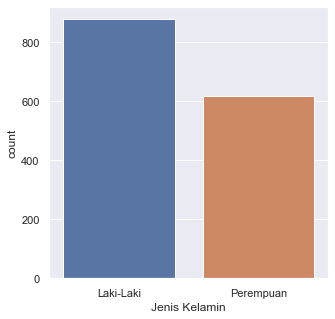

In [15]:
plt.figure(figsize=(5, 5))
g = sns.countplot(x="Jenis Kelamin", data = df, order = df['Jenis Kelamin'].value_counts().index)

### Jumlah Dosen Berdasarkan Pendidikan Terakhir

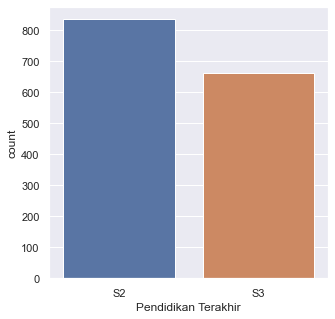

In [16]:
plt.figure(figsize=(5, 5))
g = sns.countplot(x="Pendidikan Terakhir", data = df, order = df['Pendidikan Terakhir'].value_counts().index)

### Jumlah Dosen Setiap Fakultas

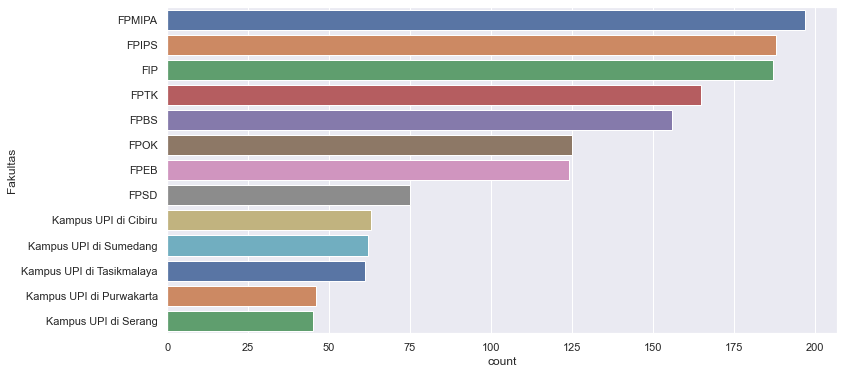

In [17]:
plt.figure(figsize=(12, 6))
plt.rcParams["figure.autolayout"] = True

g = sns.countplot(y="Fakultas", data=df, order = df['Fakultas'].value_counts().index, palette="deep")

### Jumlah Dosen Berdasarkan Jenis Kelamin Setiap Fakultas

[Text(0.5, 0, 'Count'), Text(0, 0.5, 'Fakultas')]

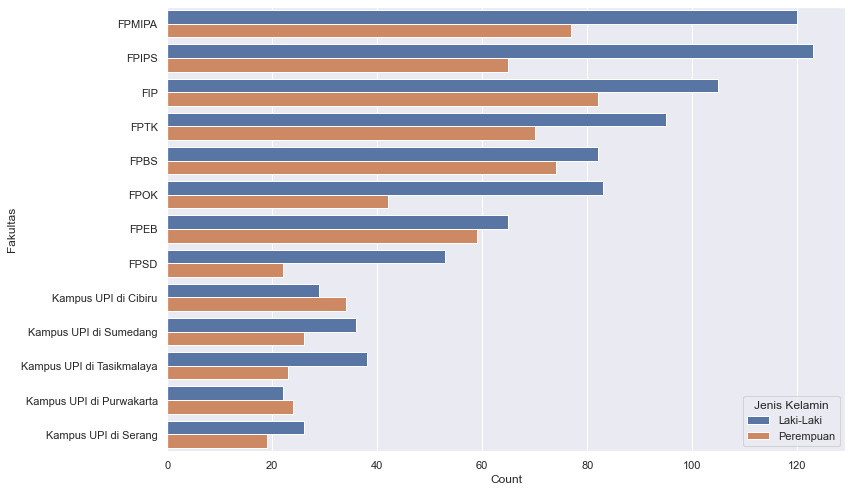

In [18]:
plt.figure(figsize=(12, 7))
plt.rcParams["figure.autolayout"] = True

g = sns.countplot(y="Fakultas", hue="Jenis Kelamin", data=df, order=df['Fakultas'].value_counts().index, palette="deep")
g.set(xlabel='Count', ylabel='Fakultas')

### Jumlah Dosen Berdasarkan Pendidikan Terakhir Setiap Fakultas

[Text(0.5, 0, 'Count'), Text(0, 0.5, 'Fakultas')]

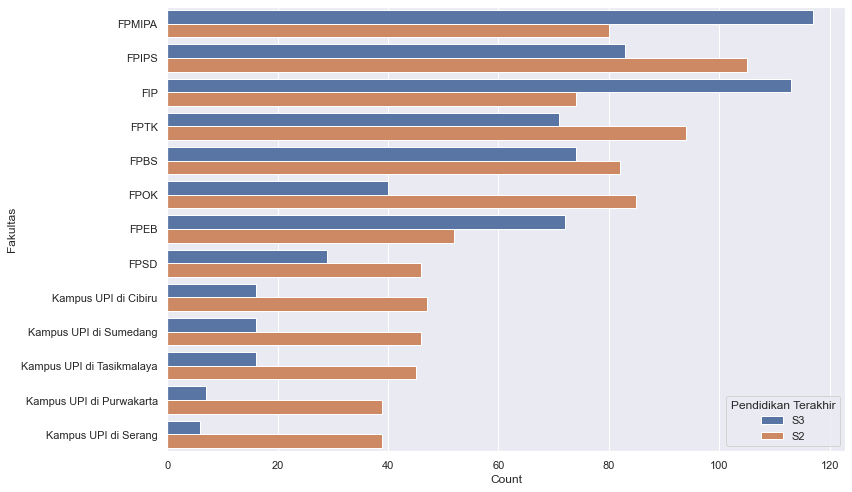

In [19]:
plt.figure(figsize=(12, 7))
plt.rcParams["figure.autolayout"] = True

g = sns.countplot(y="Fakultas", hue="Pendidikan Terakhir", data=df, order=df['Fakultas'].value_counts().index, palette="deep")
g.set(xlabel='Count', ylabel='Fakultas')

### Distribusi Usia Dosen

In [20]:
df['Usia'].describe()

count    1494.000000
mean       47.092369
std        11.910563
min        25.000000
25%        36.000000
50%        47.000000
75%        58.000000
max        78.000000
Name: Usia, dtype: float64

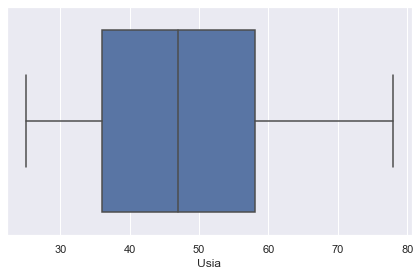

In [21]:
ax = sns.boxplot(data=df, x="Usia")

### Tingkat Kedalaman Usia Dosen Berdasarkan Jenis Kelamin

Text(0.5, 1.0, 'Tingkat Kedalaman Usia Dosen Berdasarkan Jenis Kelamin')

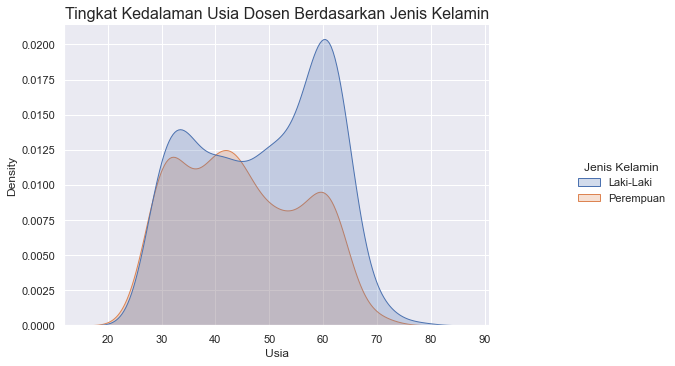

In [22]:
g = sns.displot(df, x="Usia", hue="Jenis Kelamin", kind="kde", fill=True)
g.fig.set_figwidth(10)
plt.title("Tingkat Kedalaman Usia Dosen Berdasarkan Jenis Kelamin", fontsize=16)

### Tingkat Kedalaman Usia Dosen Berdasarkan Pendidikan Terakhir

Text(0.5, 1.0, 'Tingkat Kedalaman Usia Dosen Berdasarkan Pendidikan Terakhir')

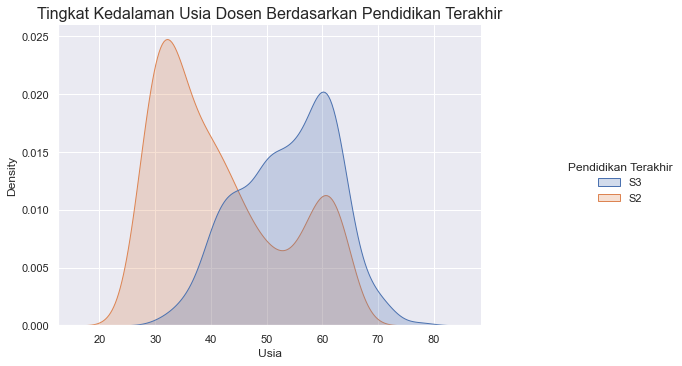

In [23]:
g = sns.displot(df, x="Usia", hue="Pendidikan Terakhir", kind="kde", fill=True)
g.fig.set_figwidth(10)
plt.title("Tingkat Kedalaman Usia Dosen Berdasarkan Pendidikan Terakhir", fontsize=16)

### Distribusi Usia Dosen Berdasarkan Jenis Kelamin Setiap Fakultas

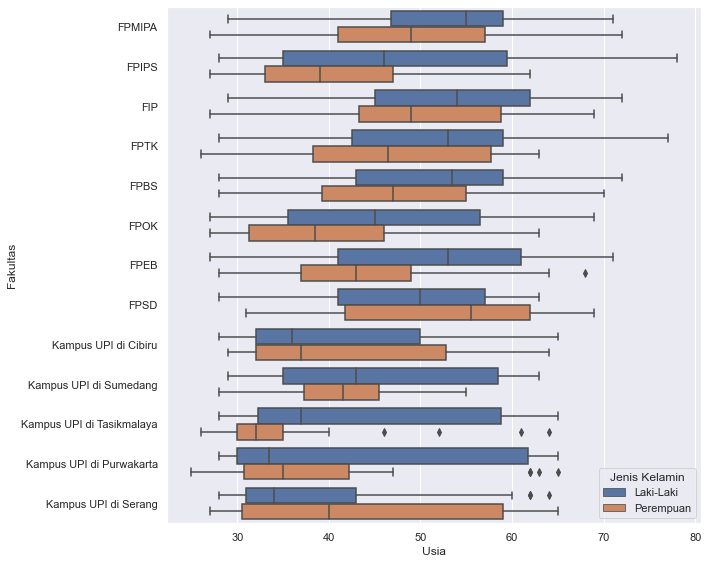

In [24]:
plt.figure(figsize=(10, 8))
g = sns.boxplot(x="Usia", y="Fakultas", hue="Jenis Kelamin", data=df, 
                order = df['Fakultas'].value_counts().index, palette="deep")

### Distribusi Usia Dosen Berdasarkan Pendidikan Terakhir Setiap Fakultas

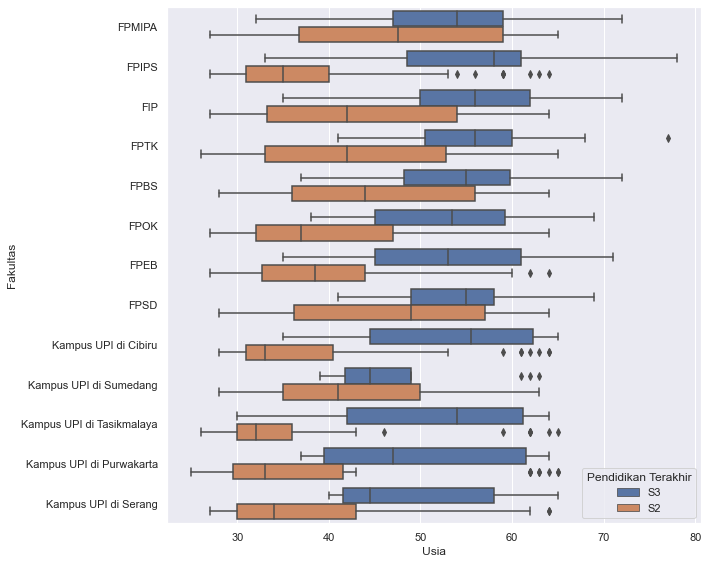

In [25]:
plt.figure(figsize=(10, 8))
g = sns.boxplot(x="Usia", y="Fakultas", hue="Pendidikan Terakhir", data=df, 
                order = df['Fakultas'].value_counts().index, palette="deep")

### Distribusi SINTA Score

In [26]:
df['sinta_score'].describe()

count    1437.000000
mean      218.952138
std       230.324918
min         0.000000
25%        43.000000
50%       131.000000
75%       336.000000
max       995.000000
Name: sinta_score, dtype: float64

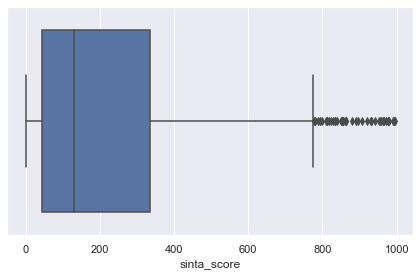

In [27]:
ax = sns.boxplot(data=df, x="sinta_score")

### Distribusi SINTA Score Setiap Fakultas

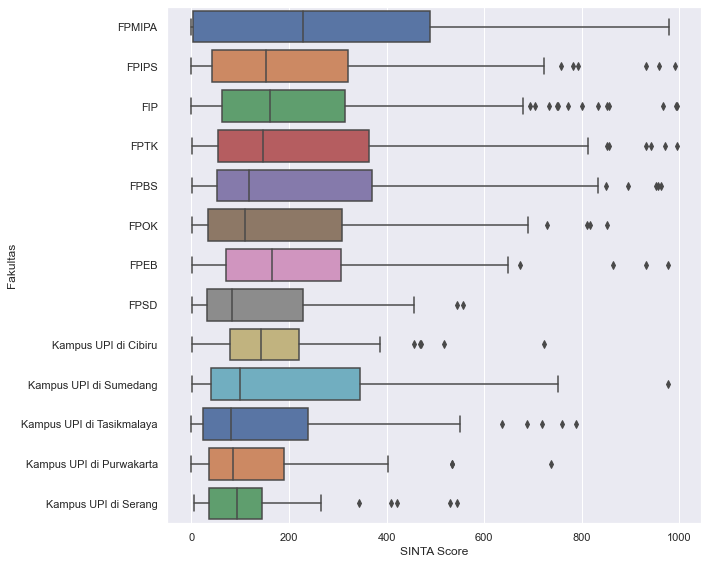

In [28]:
plt.figure(figsize=(10, 8))
# plt.rcParams["figure.autolayout"] = True

fig = sns.boxplot(x ='sinta_score', y = 'Fakultas', data = df, order = df['Fakultas'].value_counts().index, palette="deep", width=0.8)

fig.set(xlabel='SINTA Score', ylabel='Fakultas')
# fig.set_title('Persebaran SINTA Score Per Fakultas', fontsize=16)
plt.show()

### Distribusi SINTA Score Berdasarkan Jenis Kelamin Dosen Setiap Fakultas

[Text(0.5, 1.0, 'Kamda Serang')]

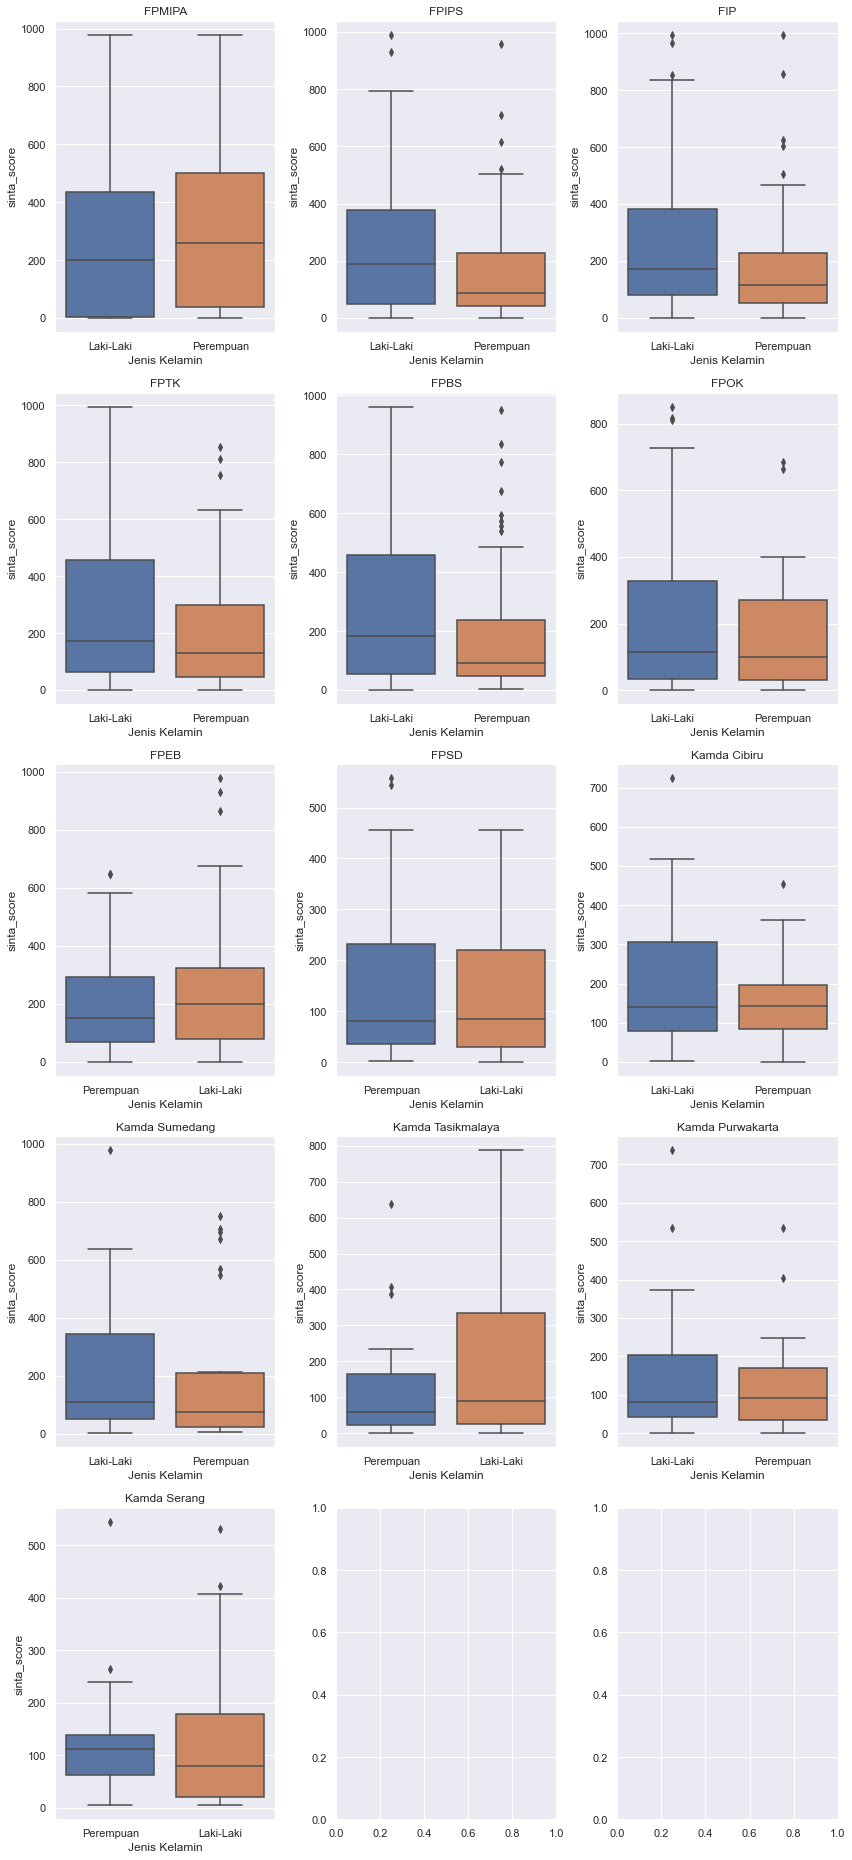

In [29]:
fpmipa = df.loc[df['Fakultas'] == "FPMIPA"]
fpips = df.loc[df['Fakultas'] == "FPIPS"]
fip = df.loc[df['Fakultas'] == "FIP"]
fptk = df.loc[df['Fakultas'] == "FPTK"]
fpbs = df.loc[df['Fakultas'] == "FPBS"]
fpok = df.loc[df['Fakultas'] == "FPOK"]
fpeb = df.loc[df['Fakultas'] == "FPEB"]
fpsd = df.loc[df['Fakultas'] == "FPSD"]
kamda_cibiru = df.loc[df['Fakultas'] == "Kampus UPI di Cibiru"]
kamda_sumedang = df.loc[df['Fakultas'] == "Kampus UPI di Sumedang"]
kamda_tasik = df.loc[df['Fakultas'] == "Kampus UPI di Tasikmalaya"]
kamda_pwk = df.loc[df['Fakultas'] == "Kampus UPI di Purwakarta"]
kamda_serang = df.loc[df['Fakultas'] == "Kampus UPI di Serang"]

fig, axes = plt.subplots(5, 3, figsize=(12, 26))
fig.tight_layout()
fig.tight_layout(pad=3.0)

sns.boxplot(data=fpmipa, x='Jenis Kelamin', y='sinta_score', ax=axes[0,0]).set(title='FPMIPA')
sns.boxplot(data=fpips, x='Jenis Kelamin', y='sinta_score', ax=axes[0,1]).set(title='FPIPS')
sns.boxplot(data=fip, x='Jenis Kelamin', y='sinta_score', ax=axes[0,2]).set(title='FIP')
sns.boxplot(data=fptk, x='Jenis Kelamin', y='sinta_score', ax=axes[1,0]).set(title='FPTK')
sns.boxplot(data=fpbs, x='Jenis Kelamin', y='sinta_score', ax=axes[1,1]).set(title='FPBS')
sns.boxplot(data=fpok, x='Jenis Kelamin', y='sinta_score', ax=axes[1,2]).set(title='FPOK')
sns.boxplot(data=fpeb, x='Jenis Kelamin', y='sinta_score', ax=axes[2,0]).set(title='FPEB')
sns.boxplot(data=fpsd, x='Jenis Kelamin', y='sinta_score', ax=axes[2,1]).set(title='FPSD')
sns.boxplot(data=kamda_cibiru, x='Jenis Kelamin', y='sinta_score', ax=axes[2,2]).set(title='Kamda Cibiru')
sns.boxplot(data=kamda_sumedang, x='Jenis Kelamin', y='sinta_score', ax=axes[3,0]).set(title='Kamda Sumedang')
sns.boxplot(data=kamda_tasik, x='Jenis Kelamin', y='sinta_score', ax=axes[3,1]).set(title='Kamda Tasikmalaya')
sns.boxplot(data=kamda_pwk, x='Jenis Kelamin', y='sinta_score', ax=axes[3,2]).set(title='Kamda Purwakarta')
sns.boxplot(data=kamda_serang, x='Jenis Kelamin', y='sinta_score', ax=axes[4,0]).set(title='Kamda Serang')

### Distribusi SINTA Score Berdasarkan Pendidikan Terakhir Dosen Setiap Fakultas

[Text(0.5, 1.0, 'Kamda Serang')]

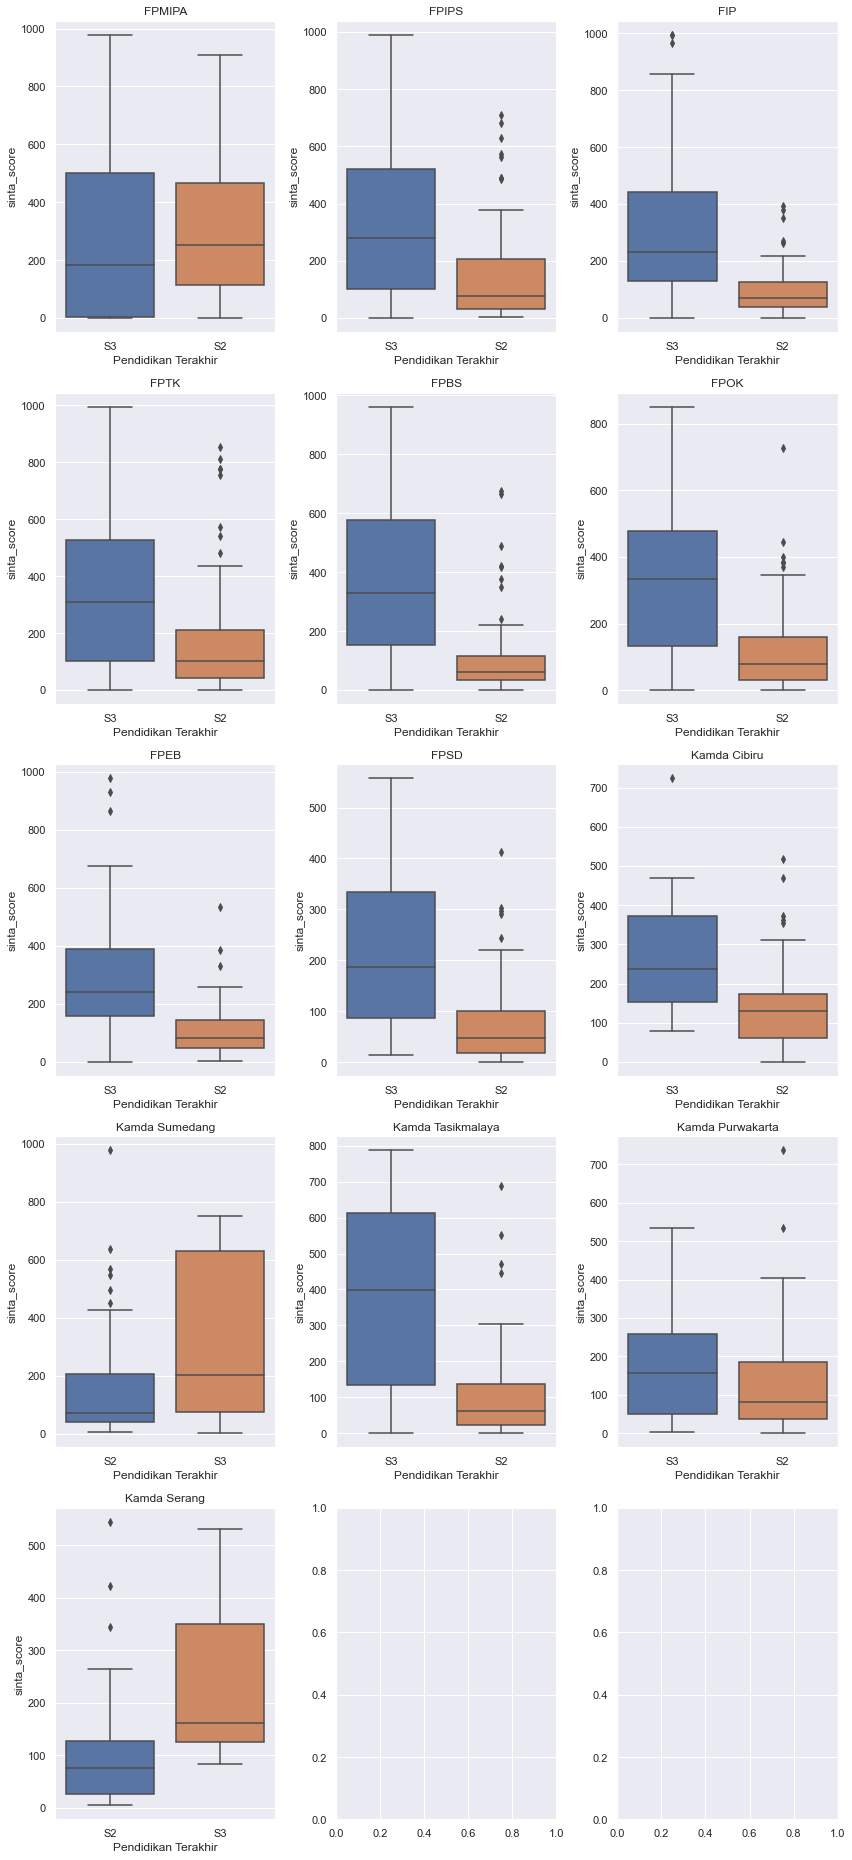

In [30]:
fig, axes = plt.subplots(5, 3, figsize=(12, 26))
fig.tight_layout()
fig.tight_layout(pad=3.0)

sns.boxplot(data=fpmipa, x='Pendidikan Terakhir', y='sinta_score', ax=axes[0,0]).set(title='FPMIPA')
sns.boxplot(data=fpips, x='Pendidikan Terakhir', y='sinta_score', ax=axes[0,1]).set(title='FPIPS')
sns.boxplot(data=fip, x='Pendidikan Terakhir', y='sinta_score', ax=axes[0,2]).set(title='FIP')
sns.boxplot(data=fptk, x='Pendidikan Terakhir', y='sinta_score', ax=axes[1,0]).set(title='FPTK')
sns.boxplot(data=fpbs, x='Pendidikan Terakhir', y='sinta_score', ax=axes[1,1]).set(title='FPBS')
sns.boxplot(data=fpok, x='Pendidikan Terakhir', y='sinta_score', ax=axes[1,2]).set(title='FPOK')
sns.boxplot(data=fpeb, x='Pendidikan Terakhir', y='sinta_score', ax=axes[2,0]).set(title='FPEB')
sns.boxplot(data=fpsd, x='Pendidikan Terakhir', y='sinta_score', ax=axes[2,1]).set(title='FPSD')
sns.boxplot(data=kamda_cibiru, x='Pendidikan Terakhir', y='sinta_score', ax=axes[2,2]).set(title='Kamda Cibiru')
sns.boxplot(data=kamda_sumedang, x='Pendidikan Terakhir', y='sinta_score', ax=axes[3,0]).set(title='Kamda Sumedang')
sns.boxplot(data=kamda_tasik, x='Pendidikan Terakhir', y='sinta_score', ax=axes[3,1]).set(title='Kamda Tasikmalaya')
sns.boxplot(data=kamda_pwk, x='Pendidikan Terakhir', y='sinta_score', ax=axes[3,2]).set(title='Kamda Purwakarta')
sns.boxplot(data=kamda_serang, x='Pendidikan Terakhir', y='sinta_score', ax=axes[4,0]).set(title='Kamda Serang')

### Distribusi SINTA 3yr Score

In [31]:
df['sinta_3yr_score'].describe()

count    1437.000000
mean      125.109339
std       162.864987
min         0.000000
25%        20.000000
50%        63.000000
75%       169.000000
max       994.000000
Name: sinta_3yr_score, dtype: float64

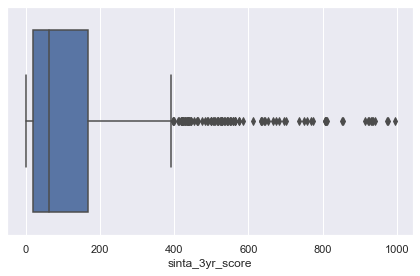

In [32]:
ax = sns.boxplot(data=df, x="sinta_3yr_score")

### Distribusi SINTA 3yr Score Setiap Fakultas

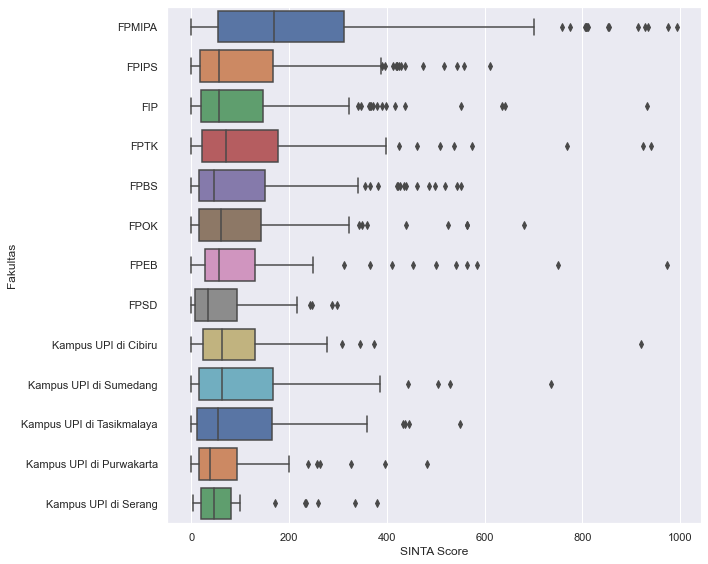

In [33]:
plt.figure(figsize=(10, 8))
# plt.rcParams["figure.autolayout"] = True

fig = sns.boxplot(x ='sinta_3yr_score', y = 'Fakultas', data = df, order = df['Fakultas'].value_counts().index, palette="deep", width=0.8)

fig.set(xlabel='SINTA Score', ylabel='Fakultas')
plt.show()

### Distribusi SINTA 3yr Score Berdasarkan Jenis Kelamin Dosen Setiap Fakultas

[Text(0.5, 1.0, 'Kamda Serang')]

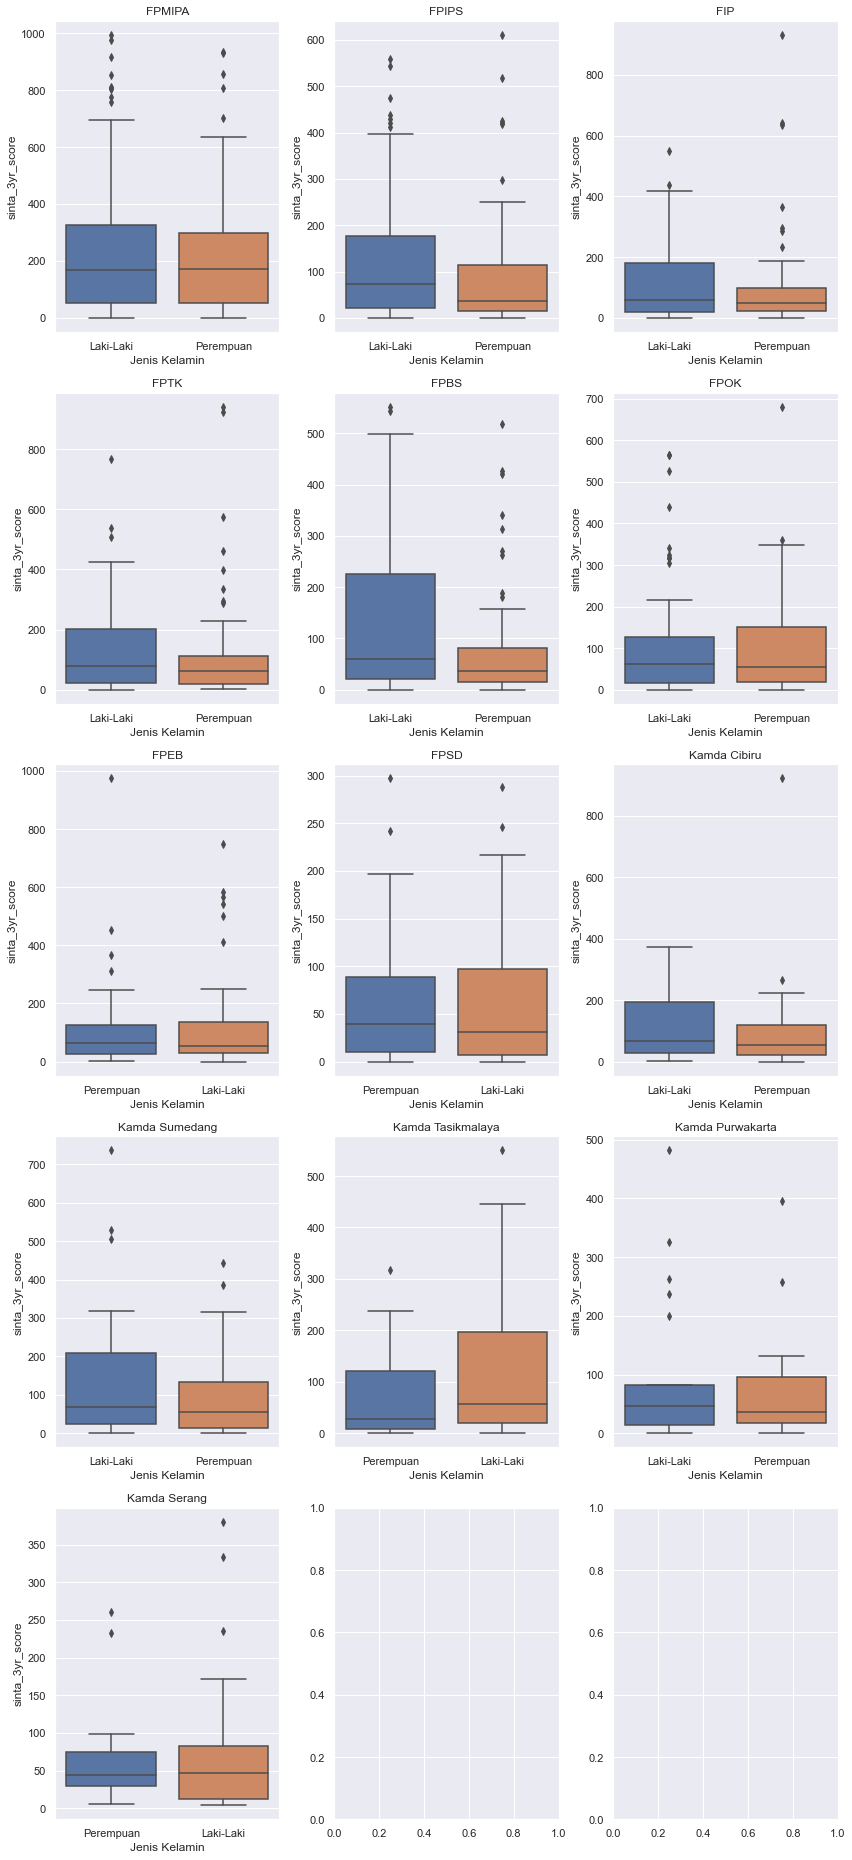

In [34]:
fig, axes = plt.subplots(5, 3, figsize=(12, 26))
fig.tight_layout()
fig.tight_layout(pad=3.0)

sns.boxplot(data=fpmipa, x='Jenis Kelamin', y='sinta_3yr_score', ax=axes[0,0]).set(title='FPMIPA')
sns.boxplot(data=fpips, x='Jenis Kelamin', y='sinta_3yr_score', ax=axes[0,1]).set(title='FPIPS')
sns.boxplot(data=fip, x='Jenis Kelamin', y='sinta_3yr_score', ax=axes[0,2]).set(title='FIP')
sns.boxplot(data=fptk, x='Jenis Kelamin', y='sinta_3yr_score', ax=axes[1,0]).set(title='FPTK')
sns.boxplot(data=fpbs, x='Jenis Kelamin', y='sinta_3yr_score', ax=axes[1,1]).set(title='FPBS')
sns.boxplot(data=fpok, x='Jenis Kelamin', y='sinta_3yr_score', ax=axes[1,2]).set(title='FPOK')
sns.boxplot(data=fpeb, x='Jenis Kelamin', y='sinta_3yr_score', ax=axes[2,0]).set(title='FPEB')
sns.boxplot(data=fpsd, x='Jenis Kelamin', y='sinta_3yr_score', ax=axes[2,1]).set(title='FPSD')
sns.boxplot(data=kamda_cibiru, x='Jenis Kelamin', y='sinta_3yr_score', ax=axes[2,2]).set(title='Kamda Cibiru')
sns.boxplot(data=kamda_sumedang, x='Jenis Kelamin', y='sinta_3yr_score', ax=axes[3,0]).set(title='Kamda Sumedang')
sns.boxplot(data=kamda_tasik, x='Jenis Kelamin', y='sinta_3yr_score', ax=axes[3,1]).set(title='Kamda Tasikmalaya')
sns.boxplot(data=kamda_pwk, x='Jenis Kelamin', y='sinta_3yr_score', ax=axes[3,2]).set(title='Kamda Purwakarta')
sns.boxplot(data=kamda_serang, x='Jenis Kelamin', y='sinta_3yr_score', ax=axes[4,0]).set(title='Kamda Serang')

### Distribusi SINTA 3yr Score Berdasarkan Pendidikan Terakhir Dosen Setiap Fakultas

[Text(0.5, 1.0, 'Kamda Serang')]

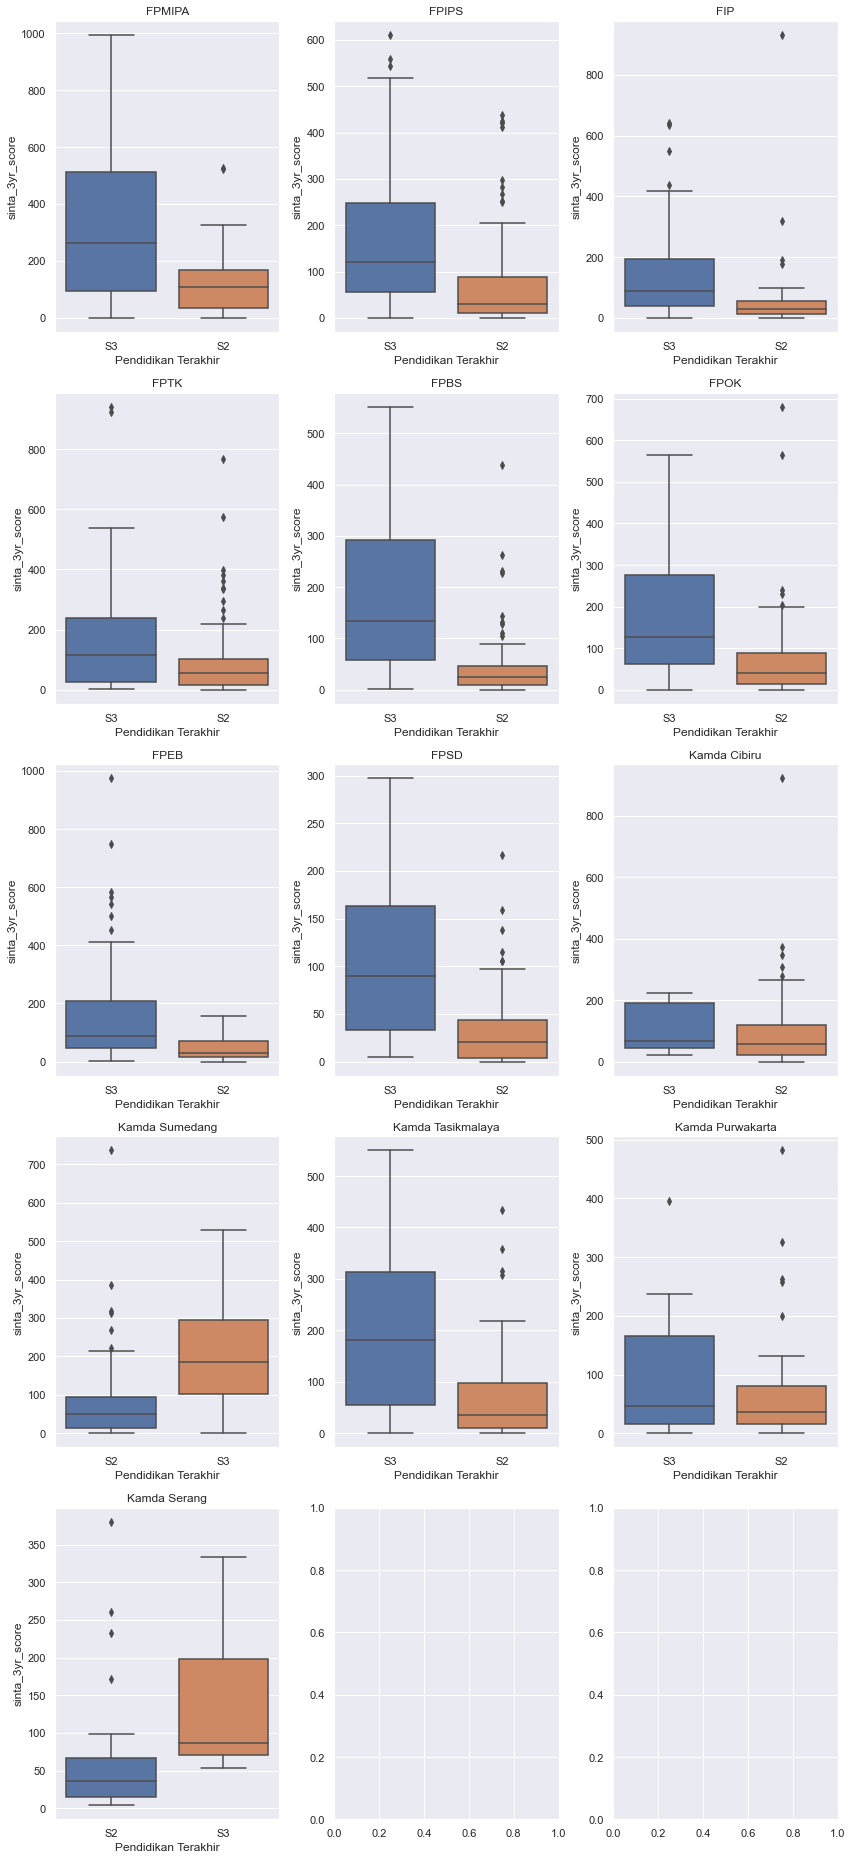

In [35]:
fig, axes = plt.subplots(5, 3, figsize=(12, 26))
fig.tight_layout()
fig.tight_layout(pad=3.0)

sns.boxplot(data=fpmipa, x='Pendidikan Terakhir', y='sinta_3yr_score', ax=axes[0,0]).set(title='FPMIPA')
sns.boxplot(data=fpips, x='Pendidikan Terakhir', y='sinta_3yr_score', ax=axes[0,1]).set(title='FPIPS')
sns.boxplot(data=fip, x='Pendidikan Terakhir', y='sinta_3yr_score', ax=axes[0,2]).set(title='FIP')
sns.boxplot(data=fptk, x='Pendidikan Terakhir', y='sinta_3yr_score', ax=axes[1,0]).set(title='FPTK')
sns.boxplot(data=fpbs, x='Pendidikan Terakhir', y='sinta_3yr_score', ax=axes[1,1]).set(title='FPBS')
sns.boxplot(data=fpok, x='Pendidikan Terakhir', y='sinta_3yr_score', ax=axes[1,2]).set(title='FPOK')
sns.boxplot(data=fpeb, x='Pendidikan Terakhir', y='sinta_3yr_score', ax=axes[2,0]).set(title='FPEB')
sns.boxplot(data=fpsd, x='Pendidikan Terakhir', y='sinta_3yr_score', ax=axes[2,1]).set(title='FPSD')
sns.boxplot(data=kamda_cibiru, x='Pendidikan Terakhir', y='sinta_3yr_score', ax=axes[2,2]).set(title='Kamda Cibiru')
sns.boxplot(data=kamda_sumedang, x='Pendidikan Terakhir', y='sinta_3yr_score', ax=axes[3,0]).set(title='Kamda Sumedang')
sns.boxplot(data=kamda_tasik, x='Pendidikan Terakhir', y='sinta_3yr_score', ax=axes[3,1]).set(title='Kamda Tasikmalaya')
sns.boxplot(data=kamda_pwk, x='Pendidikan Terakhir', y='sinta_3yr_score', ax=axes[3,2]).set(title='Kamda Purwakarta')
sns.boxplot(data=kamda_serang, x='Pendidikan Terakhir', y='sinta_3yr_score', ax=axes[4,0]).set(title='Kamda Serang')

### Perbandingan Distribusi H indeks, G index, dan i10 indeks untuk Scopus, Google Scholar, dan Web of Science

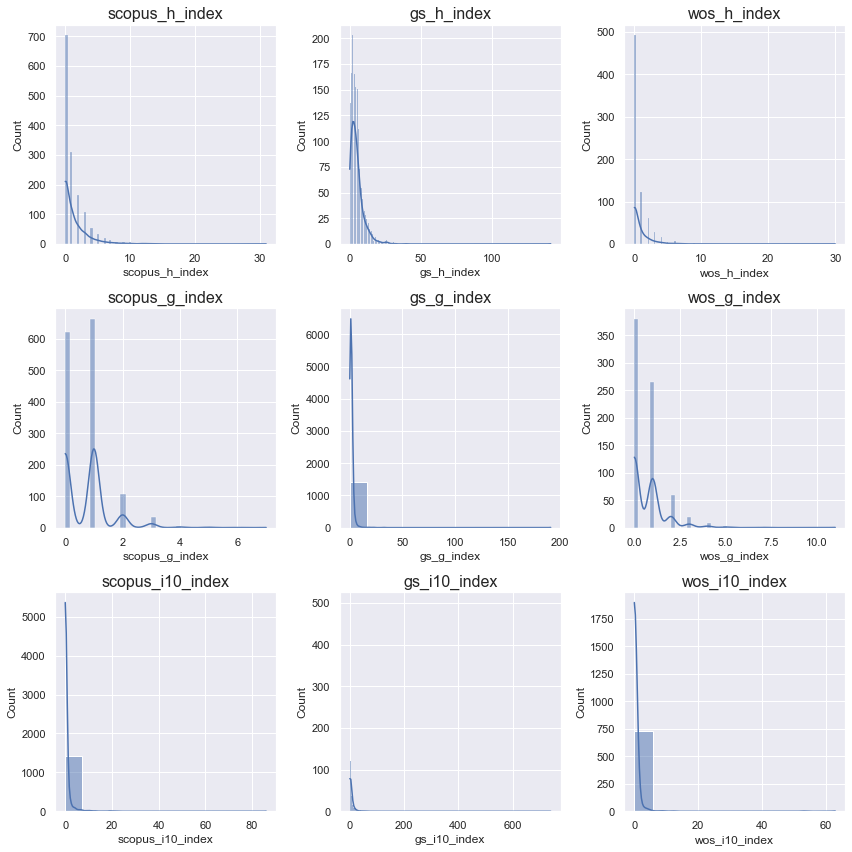

In [36]:
h_index = ['scopus_h_index', 'gs_h_index', 'wos_h_index', 
          'scopus_g_index', 'gs_g_index', 'wos_g_index', 
          'scopus_i10_index', 'gs_i10_index', 'wos_i10_index', ]

fig, axes = plt.subplots(3, 3, figsize = (12, 12))
axes = axes.ravel()
fig.tight_layout(pad = 5)

for col, ax in zip(h_index, axes):
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_title(col, fontsize = 16)

plt.show()

### Perbandingan Distribusi Jumlah Artikel Dosen untuk Scopus, Google Scholar, dan Web of Science

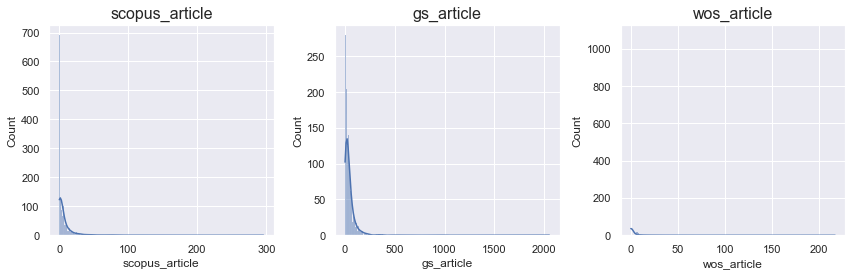

In [37]:
h_index = ['scopus_article', 'gs_article', 'wos_article'] 

fig, axes = plt.subplots(1, 3, figsize = (12, 4))
axes = axes.ravel()
fig.tight_layout(pad = 5)

for col, ax in zip(h_index, axes):
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_title(col, fontsize = 16)

plt.show()